### CS 4840 Intro Machine Learning - Lab Assignment 3

# <center>Neural Networks</center>

### 1. Overview
Neural networks are at very core of deep learning, which are versatile, powerful, and scalable, making them ideal to tackle large and highly complex machine learning tasks. The learning objective of this lab assignment is for students to understand neural networks, including how to train different neural networks with different types of datasets and the impacts of key parameters, how to evaluate their classification performances, and how to compare these results among different neural networks.

#### Lecture notes. 
Detailed coverage of these topics can be found in the following:
<li>Multi-layer perceptron</li>
<li>Convolutional neural network</li>
<li>Recurrent neural network</li>

#### Code demonstrations.
<li>Code 2024-11-04-M-Multi-Layer Perceptron using Keras.ipynb</li>
<li>Code 2024-11-13-W-Convolutional Neural Networks using Keras.ipynb</li>
<li>Code 2024-11-18-M-Recurrent Neural Networks using Keras.ipynb</li>

### 2. Submission
You need to submit a detailed lab report with code, running results, and answers to the questions. If you submit <font color='red'>a jupyter notebook (“Firstname-Lastname-4840-Lab3.ipynb”)</font>, please fill in this file directly and place the code, running results, and answers in order for each question. If you submit <font color='red'>a PDF report (“Firstname-Lastname-4840-Lab3.pdf”) with code file (“Firstname-Lastname-4840-Lab3.py”)</font>, please include the screenshots (code and running results) with answers for each question in the report.  

### 3. Questions (50 points)

For this lab assignment, you will be using the `CIFAR10` image dataset and `Reuters` text dataset to complete the following tasks and answer the questions.    

**<font color='red'>You need to use Keras to build neural networks. As Keras has been integrated into Tensorflow package, please install Tensorflow (version ≥2.0 is required) if you haven't done so yet.</font>**

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0", "The version of Tensorflow needs to be ≥2.0"
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__)
print("The version of Tensorflow you installed is ≥2.0")

2024-12-02 11:55:17.110959: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 11:55:17.134363: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0
2.18.0
The version of Tensorflow you installed is ≥2.0


#### Load and plot the `CIFAR10` data

`CIFAR10` is a dataset of 60,000 32x32 color images across 10 classes, commonly used for image classification tasks in computer vision. To avoid excessive runtime and resource usage, all these images are converted to grayscale. Loading `CIFAR10` data may take some time.

(50000, 32, 32, 1) (50000,)
(10000, 32, 32, 1) (10000,)


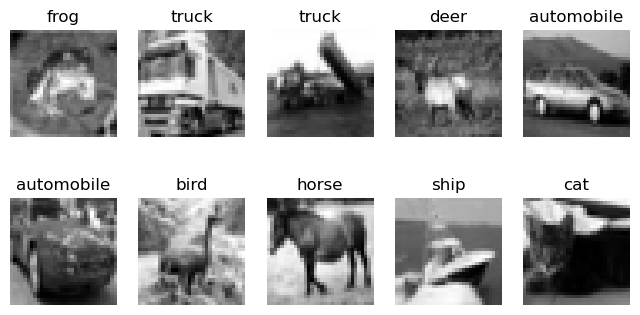

In [2]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#Download data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert images to grayscale
X_train_gray = tf.image.rgb_to_grayscale(X_train)
X_test_gray = tf.image.rgb_to_grayscale(X_test)

# Convert to numpy arrays
X_train = X_train_gray.numpy()
X_test = X_test_gray.numpy()

# Data preprocessing
X_train, X_test = X_train / 255., X_test / 255.
y_train, y_test = y_train.astype(np.uint8).squeeze(), y_test.astype(np.uint8).squeeze()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
                 "dog", "frog", "horse", "ship", "truck"]

# Plot the data
def plot_digits(instances, labels, images_per_row=5):
    for i in range(len(instances)):
        idx = i // images_per_row
        idy = i % images_per_row 
        ax[idx, idy].imshow(instances[i].squeeze(), cmap="gray")
        ax[idx, idy].set_title(class_names[labels[i]])
        ax[idx, idy].axis("off")

fig, ax = plt.subplots(2, 5, figsize=(8, 4))
example_images = X_train[:10]
example_labels = y_train[:10]
plot_digits(example_images, example_labels, images_per_row=5)
plt.show()

#### Question 1 (18 points):  
Please train a multi-layer perceptron in function `answer_one( )` using `X_train` and `y_train`. After the neural network is trained, evaluate accuracy, micro F1 score, and macro F1 score using `X_test` and `y_test`.

`drop_rate` determines the fraction of neurons that are randomly "dropped" (set to zero) during each training iteration when applying Dropout regularization.

**Set dropout rate in `keras.layers.Dropout()` as `0.0`, `0.3` and `0.5` respectively to compare the different performance** 

**All the other model settings are specified in comments** 

In [3]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score
    
tf.random.set_seed(42)
    
# Train a Multi-Layer Perceptron
      
drop_rates = [0.0, 0.3, 0.5]  # Please use 0.0, 0.3, and 0.5, respectively

def answer_one(drop_rate):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[32, 32, 1]),  # Flatten layer with input shape [32, 32, 1]
        keras.layers.Dense(300, activation="relu"),  # Dense hidden layer, 300 neurons, ReLU
        keras.layers.Dropout(drop_rate),  # Dropout layer using drop_rate to address overfitting
        keras.layers.Dense(100, activation="relu"),  # Dense hidden layer, 100 neurons, ReLU
        keras.layers.Dropout(drop_rate),  # Dropout layer using drop_rate to address overfitting
        keras.layers.Dense(10, activation="softmax")  # Dense output layer, 10 neurons, softmax
    ])
    
    model.compile(
        loss="sparse_categorical_crossentropy",  # Loss function
        optimizer="adam",  # Optimization algorithm: adam
        metrics=["accuracy"]  # Evaluation metrics: accuracy
    )
    
    model.fit(
        X_train, y_train,  # Use X_train, y_train for training
        epochs=20,  # epochs, 20
        batch_size=32,  # batch size, 32
        validation_data=(X_test, y_test)  # Use X_test, y_test for validation
    )
    
    y_proba = model.predict(X_test)  # Calculate prediction probabilities on X_test
    y_pred = np.argmax(y_proba, axis=1)  # Obtain the predicted classes from y_proba
    
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    microf1 = f1_score(y_test, y_pred, average='micro')  # Calculate micro f1
    macrof1 = f1_score(y_test, y_pred, average='macro')  # Calculate macro f1
    
    return accuracy, microf1, macrof1

# Run your function for each drop rate and print the results
for drop_rate in drop_rates:
    accuracy, microf1, macrof1 = answer_one(drop_rate)
    print(f"Dropout Rate: {drop_rate}")
    print(f"Accuracy: {accuracy}, Micro F1 Score: {microf1}, Macro F1 Score: {macrof1}\n")

: 

#### Answer 1:  

<font color='red'><b>Double click here to answer the questions in this cell: </b></font> <br>
Report the performance by three dropout rate of 0.0, 0.3, and 0.5: <br>
<b>`keras.layers.Dropout(0.0)`</b>: Training accuracy (the last epoch) is: ( ), Test accuracy is: ( ), Micro f1 score is: ( ), Macro f1 score is: ( ) <br>
<b>`keras.layers.Dropout(0.3)`</b>: Training accuracy (the last epoch) is: ( ), Test accuracy is: ( ), Micro f1 score is: ( ), Macro f1 score is: ( ) <br>
<b>`keras.layers.Dropout(0.5)`</b>: Training accuracy (the last epoch) is: ( ), Test accuracy is: ( ), Micro f1 score is: ( ), Macro f1 score is: ( ) 

Based on the training and test accuracy, and their difference, please summarize the impact of dropout on the model performance: ( )

#### Question 2 (16 points):  
Please train a convolutional neural network in function `answer_two( )` using `X_train` and `y_train`. After the neural network is trained, evaluate accuracy, micro F1 score, and macro F1 score using `X_test` and `y_test`.

**Set training epochs in `model.fit` as `10`** 

**All the other model settings are specified in comments** 

In [ ]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score

tf.random.set_seed(42)

def answer_two():
    model = keras.models.Sequential([
                                                        #Convolution layer, input shape (32, 32, 1), 32 channels, kernel (3, 3), ReLu
                                                        #MaxPooling layer, pooling size (2, 2)
                                                        #Convolution layer, 64 channels, kernel size (3, 3), ReLU 
                                                        #MaxPooling layer, pooling size (2, 2) 
                                                        #Flatten layer
                                                        #Dense output layer, 10 neurons, softmax
    ])
    
    model.compile(
                                                        #Loss function 
                                                        #Optimization algorithm: adam
                                                        #Evaluatuion metrics: accuracy 
    )
    
    model.fit(                                          #Use X_train, y_train for training
                                                        #epochs, 10
                                                        #batch size, 32
                                                        #Use X_test, y_test for validation
    )
    
    y_proba =                                           #Calculate prediction proabilities on X_test
    y_pred =                                            #Obtain the predicted classes from y_proba
    
    accuracy =                                          #Calculate accuracy
    microf1 =                                           #Calculate micro f1
    macrof1 =                                           #Calculate macro f1
    
    return accuracy, microf1, macrof1

#Run your function in the cell to return the results
accuracy_2, microf1_2, macrof1_2 = answer_two()
print(accuracy_2, microf1_2, macrof1_2)

#### Answer 2:  

<font color='red'><b>Double click here to answer the questions in this cell: </b></font> <br>
Test accuracy is: ( ), Micro f1 score is: ( ), Macro f1 score is: ( )

Based on the best performance of multi-layer perceptron (20 epochs) in Question 1 and the performance of convulotional neural network (10 epochs), please summarize your observation: ( ), and explain why: ( )

#### Load and print the `Reuters` data

`Reuters` is a dataset, including a collection of 11,228 newswire articles categorized into 46 topics, widely used for multi-class text classification tasks.

In [ ]:
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences

#Download data and split into train and test sets
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Class names for Reuters
class_names = [
    "cocoa", "grain", "crude", "money-fx", "earn", "acq", "wheat", "corn",
    "dlr", "sugar", "coffee", "gold", "veg-oil", "jobs", "money-supply",
    "oilseed", "earnings", "nat-gas", "reserves", "cotton", "housing", "gas",
    "silver", "zinc", "tin", "income", "alum", "lead", "copper", "retail",
    "carcass", "potato", "livestock", "iron-steel", "rubber", "citrus",
    "instal-debt", "money-market", "heatwave", "nickel", "fuel-oil", "sunseed"
]

# Setup hyperparameters
vocab_size = 10000  # Number of unique words to consider
max_len = 50        # Maximum length of each review (padding/truncation)

# Filter out-of-vocabulary indices
def filter_out_of_vocab_indices(data, vocab_size):
    return [[min(word, vocab_size - 1) for word in review] for review in data]

X_train = filter_out_of_vocab_indices(X_train, vocab_size)
X_test = filter_out_of_vocab_indices(X_test, vocab_size)

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

# Print the data
print(X_train[0])
print(y_train[0], "-->", class_names[y_train[0]])

#### Question 3 (16 points):  
Please train a recurrent neural network in function `answer_three( )` using `X_train` and `y_train`. After the neural network is trained, evaluate accuracy, micro F1 score, and macro F1 score using `X_test` and `y_test`.

**Set training epochs in `model.fit` as `10`** 

**All the other model settings are specified in comments** 

In [ ]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score

tf.random.set_seed(42)

def answer_three():
    model = keras.models.Sequential([
                                                        #Embedding layer, input_dim (vocab_size), output_dim (32), input_length (max_len)    
                                                        #RNN layer, hidden size 64, dropout rate 0.3, ReLU
                                                        #Dense output layer, 46 neurons, softmax
    ])
    
    model.compile(
                                                        #Loss function 
                                                        #Optimization algorithm: adam
                                                        #Evaluatuion metrics: accuracy 
    )
    
    model.fit(                                          #Use X_train, y_train for training
                                                        #epochs, 10
                                                        #batch size, 32
                                                        #Use X_test, y_test for validation
    )
    
    y_proba =                                           #Calculate prediction proabilities on X_test
    y_pred =                                            #Obtain the predicted classes from y_proba
    
    accuracy =                                          #Calculate accuracy
    microf1 =                                           #Calculate micro f1
    macrof1 =                                           #Calculate macro f1
    
    return accuracy, microf1, macrof1

#Run your function in the cell to return the results
accuracy_3, microf1_3, macrof1_3 = answer_three()
print(accuracy_3, microf1_3, macrof1_3)

#### Answer 3:  

<font color='red'><b>Double click here to answer the questions in this cell: </b></font> <br>
Test accuracy is: ( ), Micro f1 score is: ( ), Macro f1 score is: ( )

Based on the performance of recurrent neural network on `Reuters` dataset with 46 classes, please summarize your observation: ( ), and share your thoughts for further improving its performance: ( )